In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import master_ROCKE3D as mr
import os, glob

from matplotlib import gridspec, colorbar, colors
from netCDF4 import Dataset
from numpy import ma

In [2]:
def sorter(filename):
    """
    Get an item from the list (one-by-one) and return a score for that item.
    Sorts based on PXXX in the .nc filename which occurs at the 17th-21st index for the files I'm looking at
    """
    return filename[17:21]

In [3]:
insolation = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]

C:\Users\ylinh\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


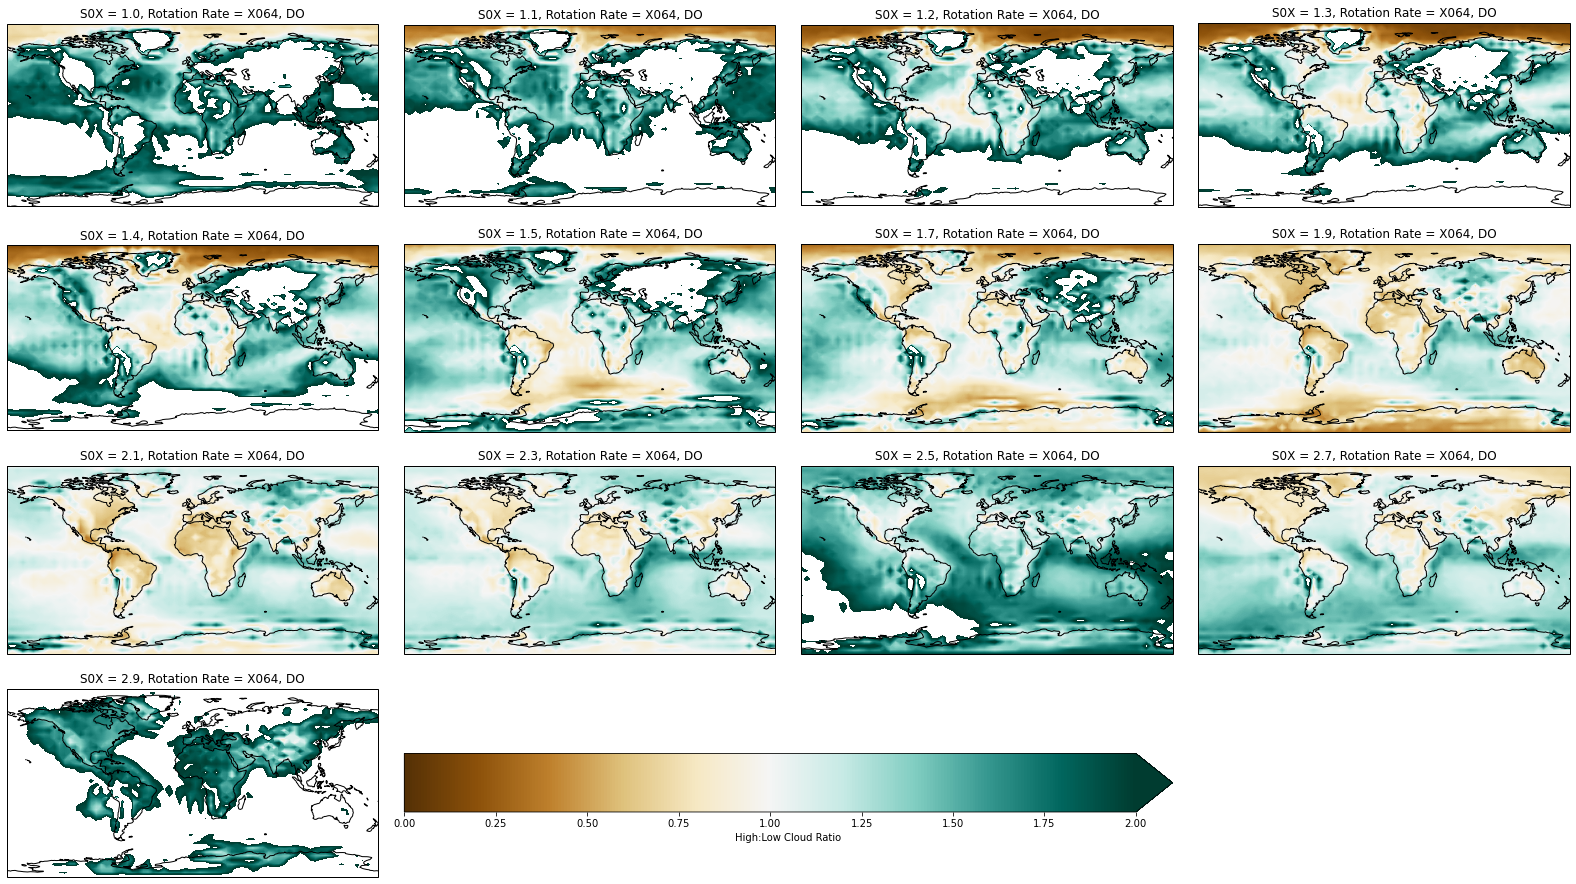

In [4]:
# Can change AIJ and X064 for the relevant directory and filenames. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.1, wspace=.07)
ax = []

## Change these
min_val = 0 # for contour levels and colorbar
max_val = 2

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'pcldl'
var2 = 'pcldh'
####################

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.ratio_var_ROCKE3D(path, files[i], var1, var2)
    var_diff = np.ma.masked_less(var_diff, 0)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i], projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(min_val, max_val,1000), cmap='BrBG')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('BrBG'),
                             norm=norm,orientation='horizontal',extend='max')
cbar.ax.set_aspect(.08)
cbar.set_label('High:Low Cloud Ratio')

plt.show()